In [19]:
import numpy as np
import torch
from PIL import Image
from matplotlib import pyplot as plt

In [20]:
file = '../example-tiny-cityscapes/aachen/aachen_000000_000019_gtFine_instanceIds.png'

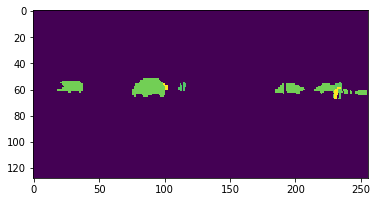

In [21]:
image = np.asarray(Image.open(file))

plt.imshow(image)

In [22]:
np.unique(image)

array([    1,     3,     4,     7,     8,    11,    17,    20,    21,
          22,    23, 24000, 24001, 25000, 26003, 26004, 26005, 26006,
       26007, 26008, 26009, 26010, 33000, 33001], dtype=int32)

In [23]:
xs, ys = np.where(image == 25000)
(np.floor(np.mean(xs)), np.floor(np.mean(ys)))

(59.0, 232.0)

In [37]:
image.shape

(128, 256)

In [35]:
centroids = np.zeros(image.shape + (2,))
for value in np.unique(image):
    xs, ys = np.where(image == value)
    centroids[xs, ys] = np.array((np.floor(np.mean(xs)), np.floor(np.mean(ys))))

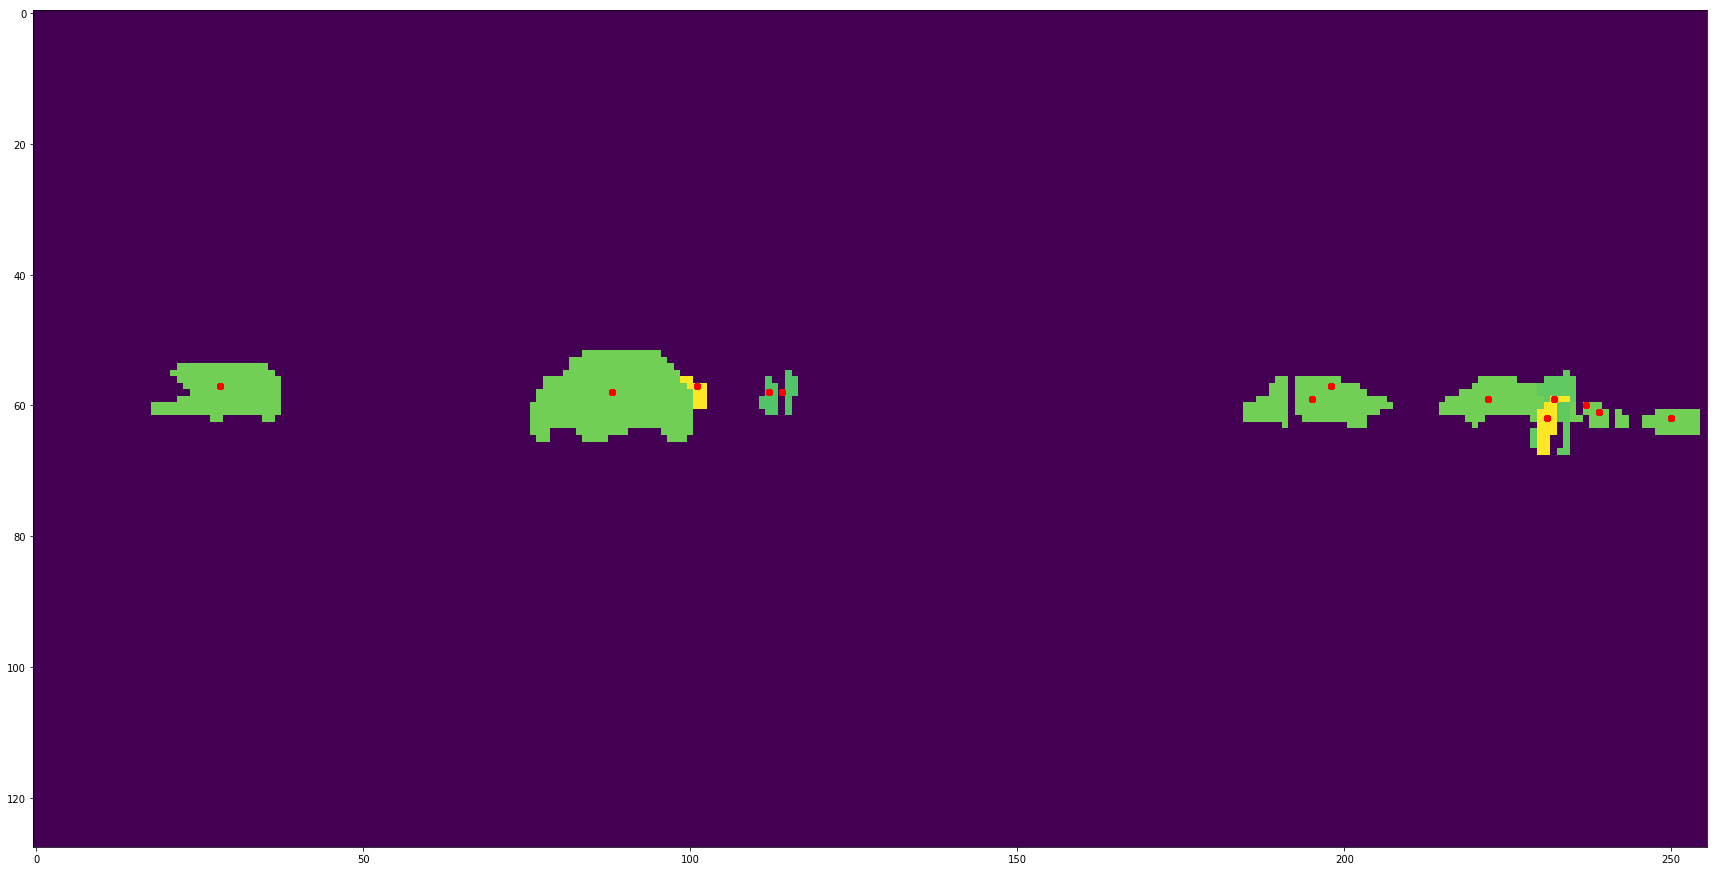

In [55]:
plt.figure(figsize=(30, 30))
plt.imshow(image)
xs = []
ys = []
for i in range(centroids.shape[0]):
    for j in range(centroids.shape[1]):
        if image[i][j] < 1000:
            continue
        xs.append(centroids[i][j][0])
        ys.append(centroids[i][j][1])
# xs, ys = np.where(image == 26010)
plt.scatter(ys, xs, c='r')

In [82]:
coordinates = np.zeros(image.shape + (2,))
g1, g2 = np.mgrid[range(image.shape[0]), range(image.shape[1])]
# np.meshgrid(range(image.shape[1]), range(image.shape[0]))
coordinates[:, :, 0] = g1
coordinates[:, :, 1] = g2
vecs = centroids - coordinates
mask = np.ma.masked_where(image >= 1000, image)

# coordinates

# vecs = np.zeros((image.shape[0], image.shape[1], 2))
# for x in range(0,image.shape[0]):
#     for y in range(0, image.shape[1]):
#         if image[x, y] >= 24000:
#             vecs[x, y, :] = np.array((x, y)) - centroids[x, y]

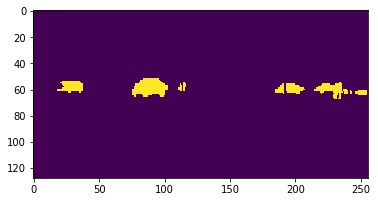

In [83]:
image_mask = np.array(mask.mask, dtype=int)
plt.imshow(image_mask)
plt.show()

-12.0
12.0
0.0
1.0


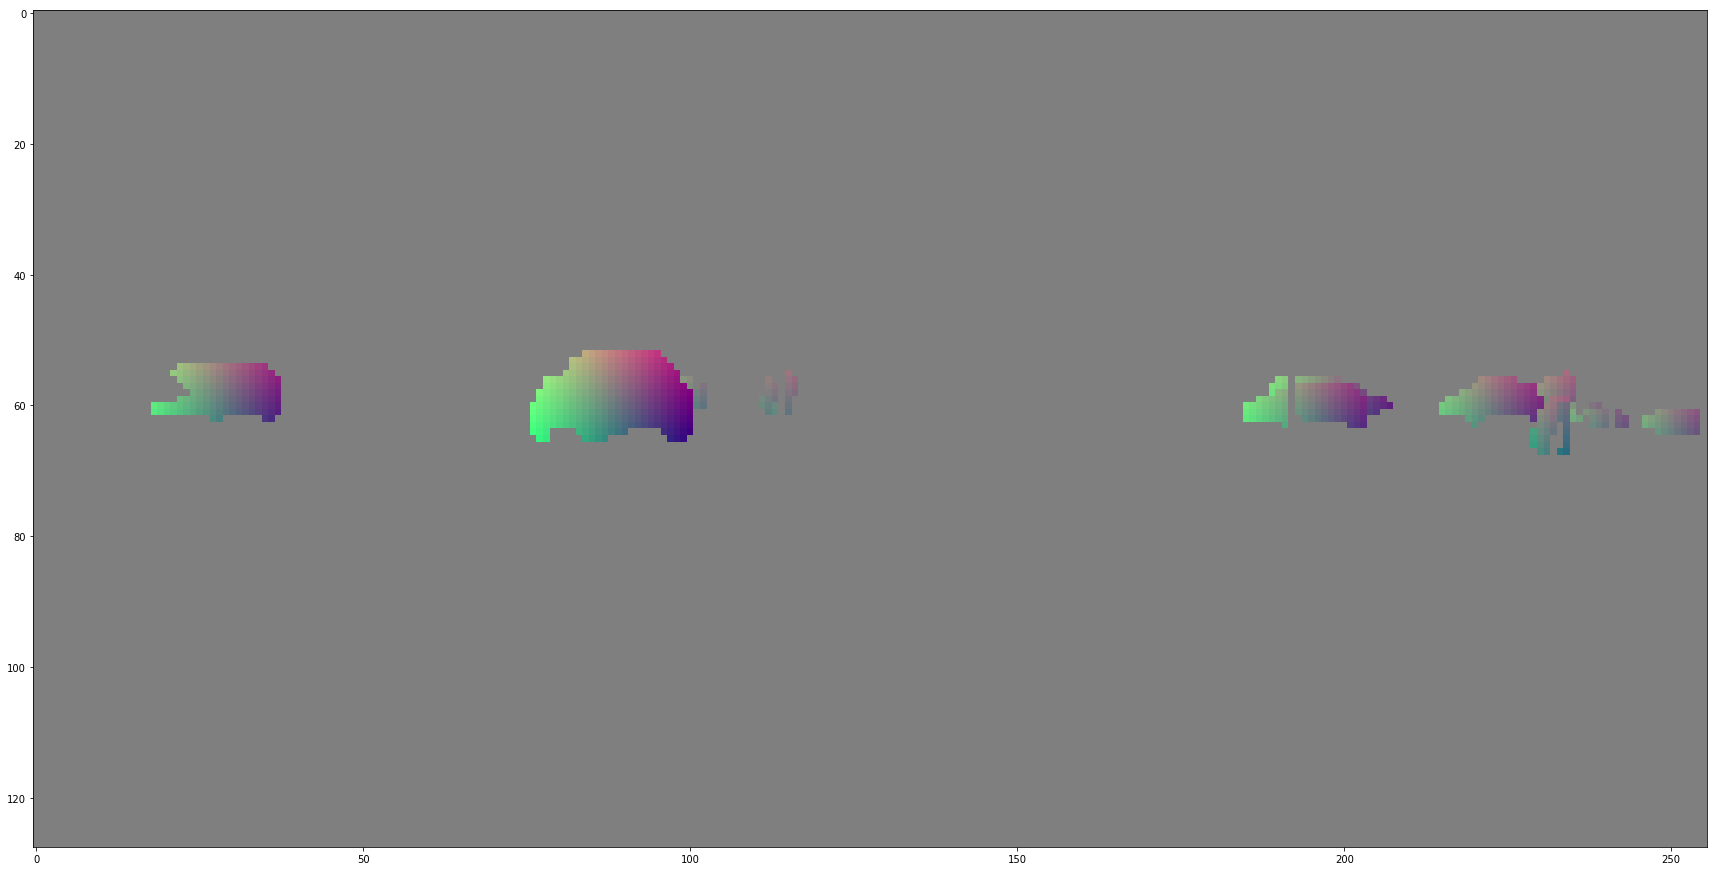

In [88]:
inst_only = np.zeros((vecs.shape[0], vecs.shape[1], 3))
for i in range(inst_only.shape[0]):
    for j in range(inst_only.shape[1]):
        if image[i][j] > 1000:
            inst_only[i][j][:2] = vecs[i][j]

print(np.min(inst_only))
print(np.max(inst_only))
inst_only = inst_only - np.min(inst_only)
inst_only = inst_only / np.max(inst_only)
print(np.min(inst_only))
print(np.max(inst_only))
plt.figure(figsize=(30, 30))
plt.imshow(inst_only)

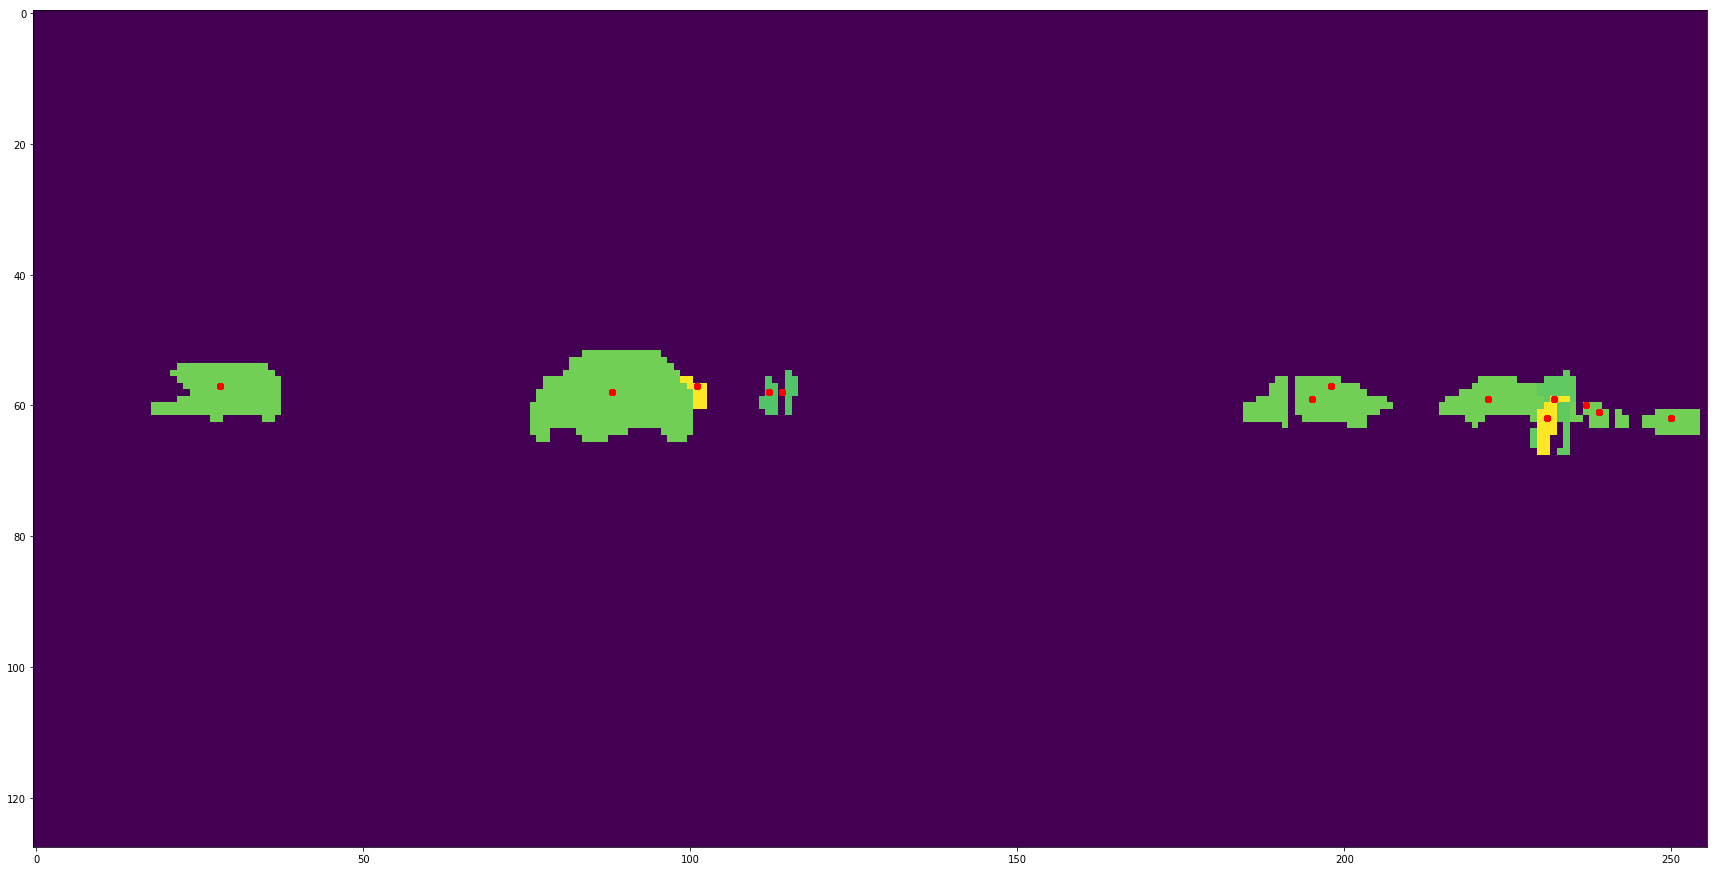

In [85]:
plt.figure(figsize=(30, 30))
plt.imshow(image)
xs = []
ys = []
for i in range(vecs.shape[0]):
    for j in range(vecs.shape[1]):
        if image[i][j] < 1000:
            continue
        xs.append(vecs[i][j][0] + i)
        ys.append(vecs[i][j][1] + j)
# xs, ys = np.where(image == 26010)
plt.scatter(ys, xs, c='r')

In [27]:
crop = image[400:600, 0:250]
np.unique(crop, return_counts=True)


(array([    3,     7,    11,    17,    20,    21,    22, 26009],
       dtype=int32),
 array([ 1200,  4630,  5223,  3516,  8249,  1210, 20601,  5371]))

ValueError: assignment destination is read-only